In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import SimpleITK as sitk

In [41]:
def plotCheckerboard(image1, image2, pattern=(4, 4), save=False):
    imagesCheckerboard = sitk.CheckerBoard(image1, image2, pattern)
    
    fig_check, ax_check = plt.subplots(1, 1)
    ax_check.imshow(sitk.GetArrayViewFromImage(imagesCheckerboard), cmap="gray")
    ax_check.set_axis_off()
    fig_check.tight_layout()
    plt.show()
    
    if save:
        fig_check.savefig(f"{regDir}pacient{patientNumber}Check{view.upper()}.pdf", bbox_inches="tight")

def plotImages(fixed_image, moving_image, moving_initial, save):
    fig_fixed, ax_fixed = plt.subplots(1, 1)
    ax_fixed.imshow(sitk.GetArrayViewFromImage(fixed_image), cmap="gray")
    ax_fixed.set_axis_off()
    fig_fixed.tight_layout()
    
    fig_moving, ax_moving = plt.subplots(1, 1)
    ax_moving.imshow(sitk.GetArrayViewFromImage(moving_image), cmap="gray")
    ax_moving.set_axis_off()
    fig_moving.tight_layout()
    
    fig_initial, ax_initial = plt.subplots(1, 1)
    ax_initial.imshow(sitk.GetArrayViewFromImage(moving_initial), cmap="gray")
    ax_initial.set_axis_off()
    fig_initial.tight_layout()
    plt.show()
        
    if save:
        fig_fixed.savefig(f"{regDir}pacient{patientNumber}Fixed{view.upper()}.pdf", bbox_inches="tight")
        fig_moving.savefig(f"{regDir}pacient{patientNumber}Moving{view.upper()}.pdf", bbox_inches="tight")
        fig_initial.savefig(f"{regDir}pacient{patientNumber}Initial{view.upper()}.pdf", bbox_inches="tight")
    

def plotAlphaBlend(image1: sitk.Image, image2, alpha=0.5, save=False):
    fig_alpha, ax_alpha = plt.subplots(1, 1)
    img1 = sitk.Cast(image1, sitk.sitkFloat32)
    img2 = sitk.Cast(image2, sitk.sitkFloat32)
    imageOutput = (alpha * img1) + (1 - alpha) * img2

    ax_alpha.imshow(sitk.GetArrayViewFromImage(imageOutput), cmap="gray")
    ax_alpha.set_axis_off()
    fig_alpha.tight_layout()
    plt.show()
    
    if save:
        fig_alpha.savefig(f"{regDir}pacient{patientNumber}Blend{view.upper()}.pdf", bbox_inches="tight")

def plotImageAndEdge(fixed_image, moving_image, lowThresh: float = 0.0, upThresh: float = 0.8, 
                     save=False):
    canny_edges = sitk.CannyEdgeDetection(sitk.GetImageFromArray(fixed_image), 
                                          lowerThreshold=lowThresh, upperThreshold=upThresh)
    edge_label = sitk.LabelContour(sitk.Cast(255 * canny_edges, sitk.sitkUInt8))
    images_combined = sitk.LabelOverlay(image=moving_image,
                                        labelImage=edge_label,
                                        opacity=1.0, backgroundValue=0.0, 
                                        colormap=(255, 0, 0)) # červené hrany
    fig_edge, ax_edge = plt.subplots(1, 1)
    ax_edge.imshow(sitk.GetArrayViewFromImage(images_combined))
    ax_edge.set_axis_off()
    fig_edge.tight_layout()
    plt.show()
    
    if save:
        fig_edge.savefig(f"{regDir}pacient{patientNumber}Edges{view.upper()}.pdf", bbox_inches="tight")
        
def plotImagesAndPoints(fixed_image, moving_pre, moving_initial, moving_final, 
                        points, save=False):
    fig_pre, ax_pre = plt.subplots(1, 1)
    ax_pre.imshow(sitk.GetArrayViewFromImage(fixed_image), cmap="gray")
    ax_pre.imshow(sitk.GetArrayViewFromImage(moving_pre), cmap="gray", alpha=0.5)
    ax_pre.scatter(list(points["fixedPoints"].T)[0], list(points["fixedPoints"].T)[1], 
                c="#1f77b4", s=10, label="Fixní body")
    ax_pre.scatter(list(points["movingPoints"].T)[0], list(points["movingPoints"].T)[1], 
                c="#ff7f0e", s=10, label="Pohyblivé body")
    ax_pre.set_axis_off()
    ax_pre.legend()
    fig_pre.tight_layout()
    ax_pre.legend()
    
    fig_initial, ax_initial = plt.subplots(1, 1)
    ax_initial.imshow(sitk.GetArrayViewFromImage(fixed_image), cmap="gray")
    ax_initial.imshow(sitk.GetArrayViewFromImage(moving_initial), cmap="gray", alpha=0.5)
    ax_initial.scatter(list(points["fixedPoints"].T)[0], list(points["fixedPoints"].T)[1], 
                c="#1f77b4", s=10, label="Fixní body")
    ax_initial.scatter(list(points["movingInitialPoints"].T)[0], list(points["movingInitialPoints"].T)[1], 
                c="#ff7f0e", s=10, label="Pohyblivé body")
    ax_initial.set_axis_off()
    fig_initial.tight_layout()
    
    fig_final, ax_final = plt.subplots(1, 1)
    ax_final.imshow(sitk.GetArrayViewFromImage(fixed_image), cmap="gray")
    ax_final.imshow(sitk.GetArrayViewFromImage(moving_final), cmap="gray", alpha=0.5)
    ax_final.scatter(list(points["fixedPoints"].T)[0], list(points["fixedPoints"].T)[1], 
                c="#1f77b4", s=10, label="Fixní body")
    ax_final.scatter(list(points["movingFinalPoints"].T)[0], list(points["movingFinalPoints"].T)[1], 
                c="#ff7f0e", s=10, label="Pohyblivé body")
    ax_final.set_axis_off()
    fig_final.tight_layout()
    plt.show()
        
    if save:
        fig_pre.savefig(f"{regDir}pacient{patientNumber}PrePoints{view.upper()}.pdf", bbox_inches="tight")
        fig_initial.savefig(f"{regDir}pacient{patientNumber}InitialPoints{view.upper()}.pdf", bbox_inches="tight")
        fig_final.savefig(f"{regDir}pacient{patientNumber}FinalPoints{view.upper()}.pdf", bbox_inches="tight")


In [33]:
patientNumber = "09"
regMethodDir = "gradient"
view = "ap"
regDir = os.path.join(os.getcwd(), f"input_files\\pacient_{patientNumber}\\registration\\{regMethodDir}\\")
imagesFile = np.load(os.path.join(regDir, f"pacient{patientNumber}Images{view.upper()}.npz"))
pointsInfoFile = np.load(os.path.join(regDir, f"pacient{patientNumber}PointsInfo{view.upper()}.npz"))


In [34]:
images = {key: imagesFile[key] for key in imagesFile.files}
pointsInfo = {key: pointsInfoFile[key] for key in pointsInfoFile.files} 

In [35]:
movingImageRescaled = sitk.Cast(sitk.RescaleIntensity(sitk.GetImageFromArray(images["movingImage"]), 
                                            0, 255), pixelID=sitk.sitkUInt8)
movingInitialImageRescaled = sitk.Cast(sitk.RescaleIntensity(sitk.GetImageFromArray(images["movingInitialImage"]), 
                                            0, 255), pixelID=sitk.sitkUInt8)
movingFinalImageRescaled = sitk.Cast(sitk.RescaleIntensity(sitk.GetImageFromArray(images["movingFinalImage"]), 
                                            0, 255), pixelID=sitk.sitkUInt8)
fixedImageRescaled = sitk.Cast(sitk.RescaleIntensity(sitk.GetImageFromArray(images["fixedImage"]), 
                                            0, 255), pixelID=sitk.sitkUInt8)

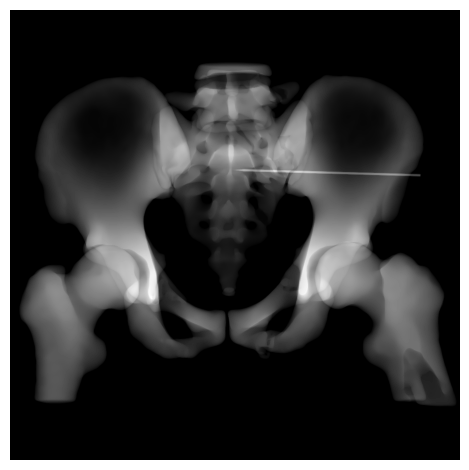

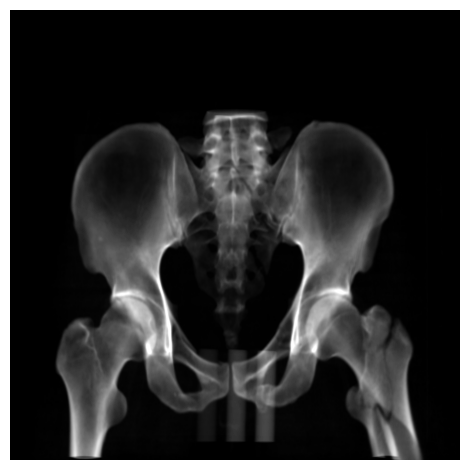

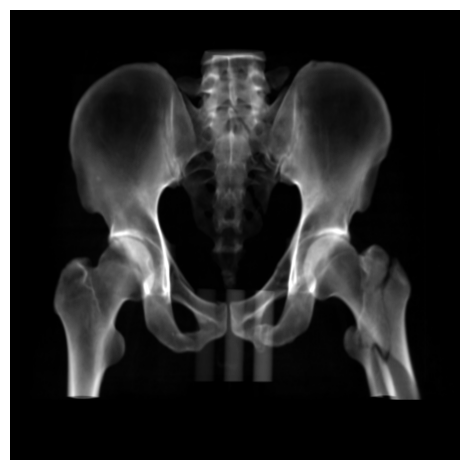

In [36]:
plotImages(fixedImageRescaled, movingImageRescaled, 
           movingInitialImageRescaled, save=True)

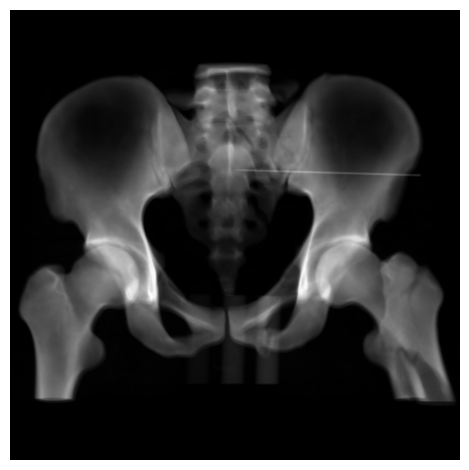

In [37]:
plotAlphaBlend(movingFinalImageRescaled, fixedImageRescaled, alpha=0.5, save=True)

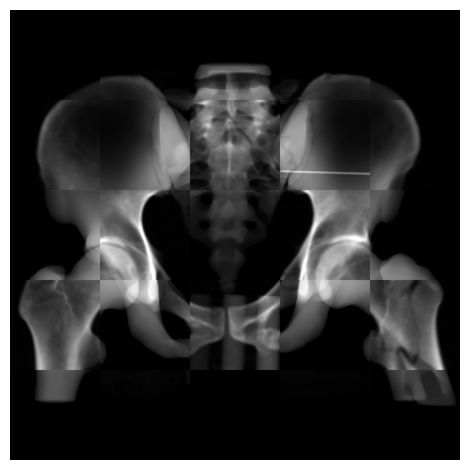

In [38]:
plotCheckerboard(fixedImageRescaled, movingFinalImageRescaled, pattern=(5, 5), save=True)

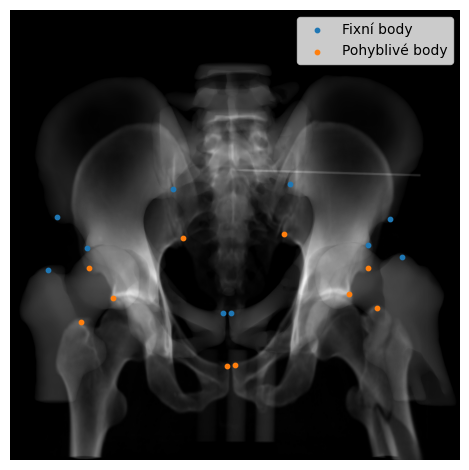

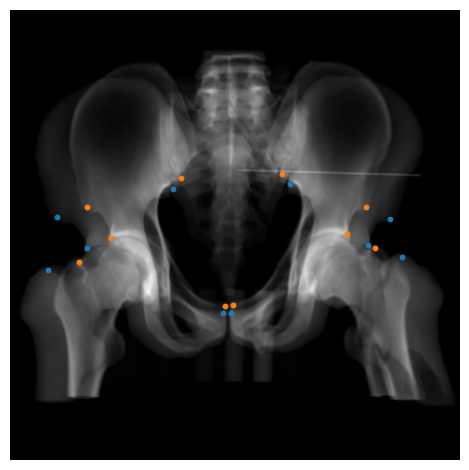

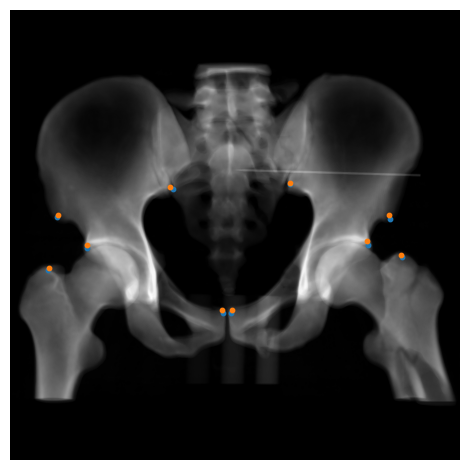

In [42]:
plotImagesAndPoints(fixedImageRescaled, movingImageRescaled, movingInitialImageRescaled,
                    movingFinalImageRescaled, points=pointsInfo, save=True)

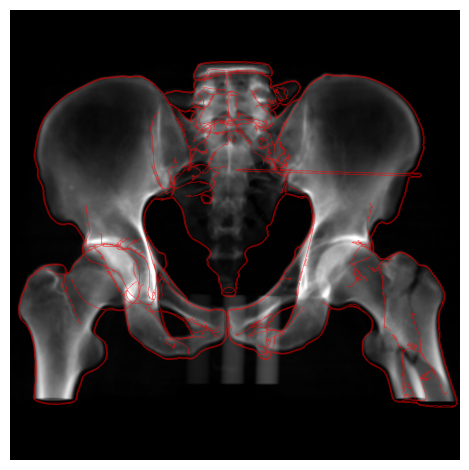

In [40]:
plotImageAndEdge(images["fixedImage"], movingFinalImageRescaled, 
                 lowThresh=0., upThresh=0.8, save=True)